In [12]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import pickle
import skvideo.io

In [13]:
def parse_log(log_file):
    result = {}
    vws = np.linspace(0.0, 1.0, 11)
    for vw in vws:
        vw = round(vw, 1)
        log = log_file.format(vw=vw)
        if os.path.exists(log):
            with open(log, 'r') as f:
                lines = f.readlines()
            lines = [lines[-2].strip(), lines[-1].strip()]
            lines = ' '.join(lines)
            print(lines)
            maps = lines.split('[')[1].split(']')[0].split(" ")
            maps = [float(m) for m in maps if m != '']
            result[vw] = maps
    
    # to csv
    df = pd.DataFrame(result)
    # add row mean
    df.loc['mean(mAP)'] = df.mean()
    for i in range(7):
        df = df.rename(index={i: f'tIoU={round((i+1)*0.1, 1)}'})
    return result, df

In [14]:
logs = '../outputs/2tower_crossmamba_3layer_ep30_vw0.7_heatmap_channelagg/eval_{vw}.log'
result, df2 = parse_log(logs)

mAP: [76.12658121 72.97300271 66.80555821 59.12381321 52.37074623 37.33203858 19.60188305]
mAP: [79.01860996 76.20557565 69.70471595 63.17858219 55.81157233 43.43716458 23.68409222]
mAP: [80.9160731  77.79231158 70.97068476 65.19629438 57.49299756 47.37841613 28.92494271]
mAP: [81.74483741 78.22802638 72.44208428 66.63293298 57.643188   49.41939642 32.07042049]
mAP: [82.15202971 78.84099754 72.98450293 67.03184608 57.78741153 49.44701185 34.00980595]
mAP: [82.69241763 79.05729954 73.47648105 67.60637823 58.34122466 50.18079693 35.80603315]
mAP: [83.12412292 78.49109178 74.56732296 67.93797193 58.96407912 50.0150217 37.21154485]
mAP: [83.08363497 78.76191523 74.39546188 66.97891628 58.58988735 49.79278608 38.31904245]
mAP: [82.69791412 78.25541948 73.86226129 65.81381036 57.9105685  49.20564199 37.75536163]
mAP: [82.18356501 78.3610201  72.99091956 65.34619972 57.47302336 48.28157817 37.88412666]
mAP: [81.34165769 77.86725543 72.43394972 64.03088861 56.89570673 47.95054033 36.06676879]


In [87]:
import matplotlib as mpl
import matplotlib.font_manager
mpl.use('Agg')
params = {'font.family': 'serif','font.serif': 'Times',
            'text.usetex': True,
            'xtick.major.size': 8,
            'ytick.major.size': 8,
            'xtick.major.width': 3,
            'ytick.major.width': 3,
            'mathtext.fontset': 'custom',
        }
mpl.rcParams.update(params)
import matplotlib.pyplot as plt
import seaborn as sns
def plot_paper_curve(df):
    # figure ratio: 2:1
    fig = plt.figure(figsize=(12, 6))
    # 深蓝色虚线
    plt.plot(df.columns, df.loc['mean(mAP)'], color='b',
             linestyle='-', marker='o', markersize=18, linewidth=5)
    
    # max value
    max_value = df.loc['mean(mAP)'].max()
    max_index = df.loc['mean(mAP)'].idxmax()
    
    # annotate max value with arrow (箭头的起点为文字的中间位置)
    plt.annotate(f'($\\omega$=0.6, Max mAP={max_value:.1f})',
                xy=(max_index, max_value),
                xytext=(max_index-0.05, max_value-4),
                textcoords='data',  # 使用偏移量来指定文本位置
                ha='center',  # 水平对齐方式为居中
                va='center',  # 垂直对齐方式为居中
                # shorter arrow
                arrowprops=dict(facecolor='black', shrink=0.15, ), fontsize=36)
    

    
    # set y limit
    plt.ylim(54, 66)
    # style:
    # show horizontal grid
    # plt.grid(axis='y')
    # fontsize
    plt.xticks(fontsize=36)
    plt.yticks(fontsize=36)
    # x, y label
    plt.xlabel('fusion factor $\\omega$', fontsize=40)
    plt.ylabel('mAP', fontsize=40)
    # axis line width
    plt.gca().spines['bottom'].set_linewidth(3)
    plt.gca().spines['left'].set_linewidth(3)
    plt.gca().spines['top'].set_linewidth(0)
    plt.gca().spines['right'].set_linewidth(0)

    # leave no empty space
    plt.tight_layout()
    plt.show()
    plt.savefig('curve.png')
    return
plot_paper_curve(df2)

In [ ]:
def plot_curve(df, title):
    # plot mean mAP curve
    plt.plot(df.columns, df.loc['mean(mAP)'])
    plt.xlabel('Visual Branch Weight')
    plt.ylabel('mean mAP')
    plt.title('mean mAP curve')
    # show digit (round to 2)
    plt.show()

In [ ]:
df = parse_log(logs)

In [13]:
df2.sort_index()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
mean(mAP),54.904803,58.720045,61.238817,62.597269,63.179087,63.880090,64.330165,64.274521,63.642997,63.217205,62.369538
tIoU=0.1,76.126581,79.018610,80.916073,81.744837,82.152030,82.692418,83.124123,83.083635,82.697914,82.183565,81.341658
tIoU=0.2,72.973003,76.205576,77.792312,78.228026,78.840998,79.057300,78.491092,78.761915,78.255419,78.361020,77.867255
tIoU=0.3,66.805558,69.704716,70.970685,72.442084,72.984503,73.476481,74.567323,74.395462,73.862261,72.990920,72.433950
tIoU=0.4,59.123813,63.178582,65.196294,66.632933,67.031846,67.606378,67.937972,66.978916,65.813810,65.346200,64.030889
tIoU=0.5,52.370746,55.811572,57.492998,57.643188,57.787412,58.341225,58.964079,58.589887,57.910568,57.473023,56.895707
tIoU=0.6,37.332039,43.437165,47.378416,49.419396,49.447012,50.180797,50.015022,49.792786,49.205642,48.281578,47.950540
tIoU=0.7,19.601883,23.684092,28.924943,32.070420,34.009806,35.806033,37.211545,38.319042,37.755362,37.884127,36.066769


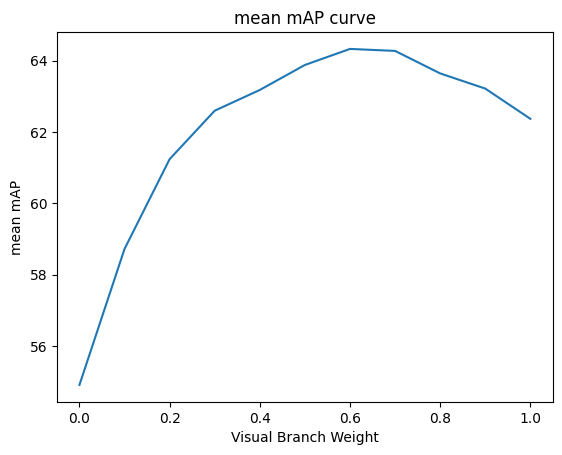

In [5]:
plot_curve(df2, 'mean mAP curve')

In [15]:
def plot_curve2(df, title, index='tIoU=0.1'):
    # plot mean mAP curve
    plt.plot(df.columns, df.loc[index])
    plt.xlabel('Visual Branch Weight')
    plt.ylabel(f'mAP@{index}')
    plt.title(title)
    # show digit (round to 2)
    plt.show()

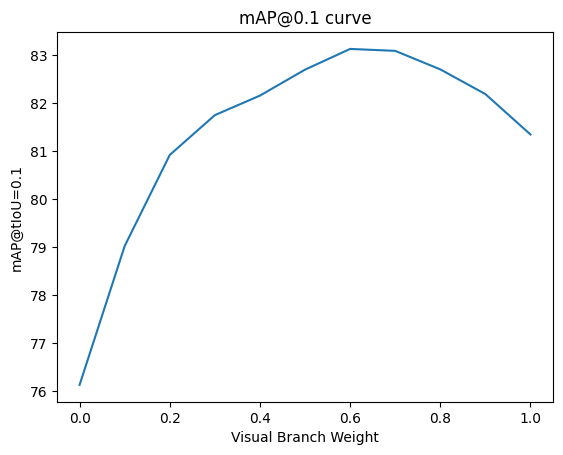

In [16]:
plot_curve2(df2, 'mAP@0.1 curve')

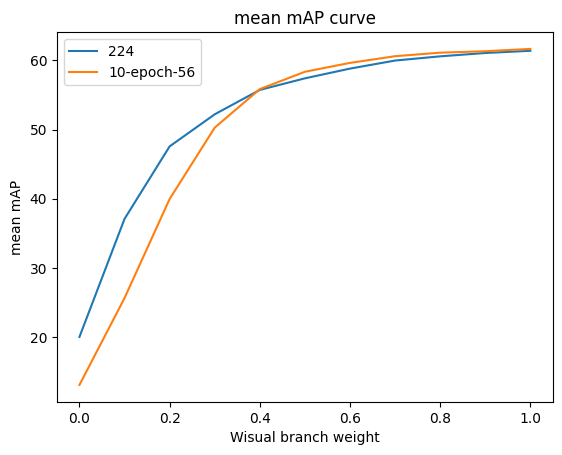

In [39]:
# plot 2 curves in one figure
plt.plot(df.columns, df.loc['mean(mAP)'], label='224')
plt.plot(df2.columns, df2.loc['mean(mAP)'], label='10-epoch-56')
plt.xlabel('Wisual branch weight')
plt.ylabel('mean mAP')
plt.title('mean mAP curve')
plt.legend()
plt.show()


mAP: [65.01845068 62.1365768  57.40622504 49.95946596 41.05935811 30.34705115 16.78622615]
mAP: [69.24188737 66.7066941  62.70042806 54.9610093  45.99466952 34.39315341 19.90267156]
mAP: [73.08239509 70.63159127 66.09434501 58.65546342 50.09906455 38.38943221 21.8496471 ]
mAP: [75.82916339 73.62491947 68.33592525 61.58305739 53.43605979 41.56688845 23.92307272]
mAP: [77.59851559 75.45916352 70.02397071 63.14449409 55.51387032 44.71844386 27.0887871 ]
mAP: [78.97751434 76.87403672 71.66128518 64.43586954 56.50890806 46.89378346 28.25833794]
mAP: [79.65062703 77.35241152 72.2982058  64.72379744 57.20090853 47.84733466 29.15244452]
mAP: [79.69453404 77.49800963 72.31303179 64.72476058 57.66930577 48.14617382 30.88796291]
mAP: [79.89539209 78.15750282 72.60360632 64.20636735 57.84234805 47.82583467 31.57844953]
mAP: [79.42889121 77.81520839 71.62021811 63.6942857  57.40172557 46.87748142 31.33040628]
mAP: [79.29722815 76.97555164 70.97102312 63.51821476 57.190484   45.79553512 31.17112513]

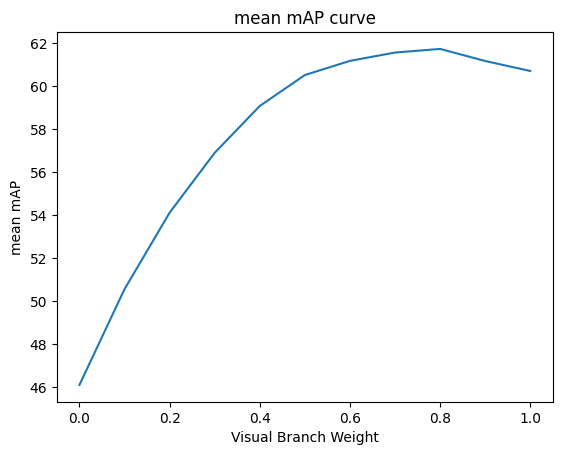

In [18]:
log_oldfeat = '../outputs/eval_oldfeat_{vw}.log'
_, df_old = parse_log(log_oldfeat)
plot_curve(df_old, 'mean mAP curve') 

mAP: [72.2234405  69.38761175 61.82461581 53.01464532 45.15815542 30.06622407 14.05827003]
mAP: [80.29577734 78.58100155 73.42245191 63.23110101 56.20117225 46.65574458 32.01996075]
mAP: [80.01856684 78.00403565 72.8766865  63.75202697 56.48208324 47.48509947 33.47022559]
mAP: [79.95721316 77.77809517 73.37655179 63.96506145 56.14324809 47.33586537 34.17997856]
mAP: [79.80482253 77.50169128 73.5255563  63.44993091 56.37518974 47.12812103 34.6475931 ]
mAP: [79.49993282 77.23454393 73.08227886 62.43953887 55.94180038 47.16355749 34.53943653]
mAP: [72.16994187 68.99443497 63.1482381  54.67112164 44.40261703 32.84920804 18.18069543]
mAP: [80.01854164 77.56174581 72.46703885 65.23556983 57.20810868 46.46318082 32.46094264]
mAP: [79.15082358 76.86475468 72.26143339 64.57264033 57.35458942 47.25988484 33.75913384]
mAP: [78.79769578 76.45185473 71.89375782 64.25595545 56.85467364 47.03485821 34.80273629]
mAP: [78.41453224 75.98130992 71.62781377 63.50136024 56.14513754 46.43565874 35.32520174]

Text(0, 0.5, 'mean mAP')

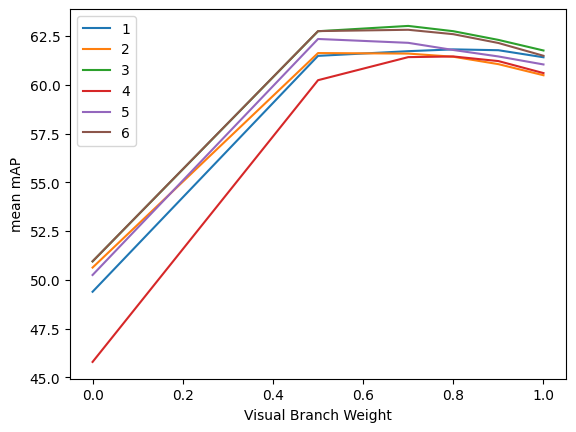

In [22]:
# multiple curve in one figure
dfs = []

logs = '../outputs/2tower_heatmape2e_DINOcrossattn/eval_{vw}.log'
result, df = parse_log(logs)
dfs.append(df)

for x in range(2,7):
    logs = '../outputs/2tower_heatmape2e_DINOcrossattn{x}layers/eval_{vw}.log'
    logs = logs.replace('{x}', str(x))
    result, df = parse_log(logs)
    dfs.append(df)

# plot all curves in one figure
for df in dfs:
    plt.plot(df.columns, df.loc['mean(mAP)'])
# legend
plt.legend(['1','2', '3', '4', '5', '6'])
plt.xlabel('Visual Branch Weight')
plt.ylabel('mean mAP')

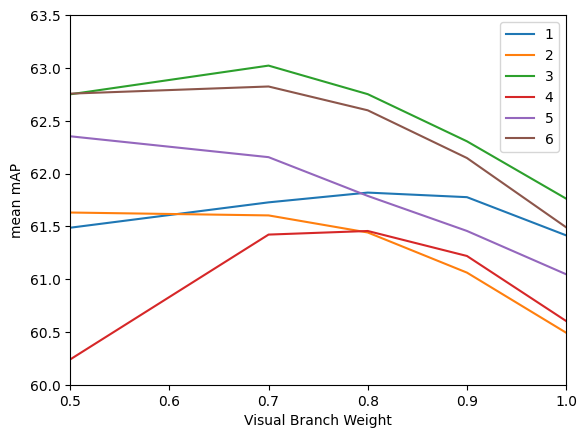

In [13]:
# ignore visual branch weight 0.0
plt.xlim(0.5, 1.0)
plt.ylim(60,63.5)
# plot all curves in one figure
for df in dfs:
    plt.plot(df.columns, df.loc['mean(mAP)'])
# legend
plt.legend(['1','2', '3', '4', '5', '6'])
plt.xlabel('Visual Branch Weight')
plt.ylabel('mean mAP')
plt.show()

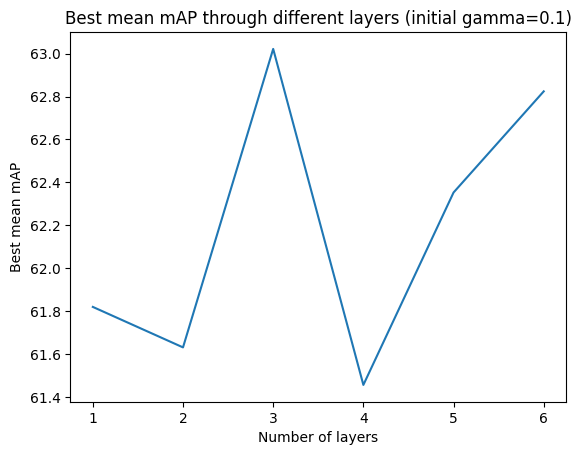

In [23]:
# plot best mean mAP through different layers
best_mAP = [df.loc['mean(mAP)'].max() for df in dfs]
plt.plot(range(1,7), best_mAP)
plt.xlabel('Number of layers')
plt.ylabel('Best mean mAP')
plt.title('Best mean mAP through different layers (initial gamma=0.1)')
plt.show()


mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]
mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]
mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]
mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]
mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]
mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]
mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]
mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]
mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]
mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]
mAP: [80.66179242 78.97003837 73.6375813  65.32708722 58.70231876 48.66034099 35.19451008]

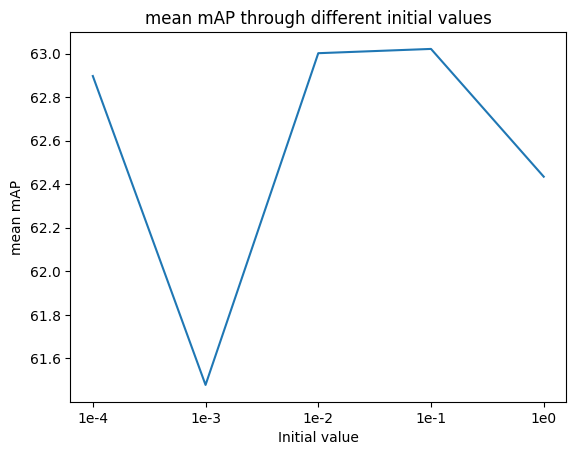

In [21]:
# plot mean mAP through different initial values
dfs = []

logs = '../outputs/2tower_heatmape2e_DINOcrossattn3layers/eval_0.7.log'
result, df = parse_log(logs)
dfs.append(df)

init_vs = ['1e-4', '1e-3', '1e-2', '1e0']
init_vs = init_vs[::-1]

for x in init_vs:
    logs = '../outputs/2tower_heatmape2e_DINOcrossattn_initv_{x}/eval_0.7.log'
    logs = logs.replace('{x}', str(x))
    result, df = parse_log(logs)
    dfs.append(df)

dfs[0], dfs[1] = dfs[1], dfs[0]

dfs=dfs[::-1]
xlabel = [f'1e{x}' for x in range(-4, 1, 1)]

plt.plot(xlabel, [df.loc['mean(mAP)'][0.7] for df in dfs])

plt.xlabel('Initial value')
plt.ylabel('mean mAP')
plt.title('mean mAP through different initial values')
plt.show()